In [1]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

system_name = 'kite3d'
run_name = 'prova'
data_dir = '../data/'+system_name+'/'+run_name+'/'
plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Evaluate the 3d kite at fixed attack angle for different angles

In [55]:
params = dict()

# ENVIRONMENT PARAMETERS
env_params = dict()
env_params['int_steps'] = 0.0005 # sec
env_params['ep_length'] = 200 # sec
env_params['decision_time'] = 0.01 # sec
env_params['init_theta'] = np.pi/4 # rad
env_params['init_dtheta'] = 0 # rad
env_params['init_alpha'] = 10 # index. Choosing alpha>=15 the initial attack angle is randomly chosen
env_params['init_phi'] = 0 # rad
env_params['init_dphi'] = 0 # rad
env_params['init_bank'] = 6 # index
# attack angles
env_params['alphas'] = [-4, 0, 4, 8, 12, 14, 16, 18, 20]
env_params['CL_alphas'] = [0.05, 0.35, 0.55, 0.75, 0.9, 1.0, 1.08, 1.1, 1.05]
env_params['CD_alphas'] = [0.001, 0.01, 0.03, 0.07, 0.1, 0.13, 0.18, 0.18, 0.21]
# wind
env_params['wind_type'] = 'const'
env_params['v_wind_x'] = 15 # m/sec
env_params['v_wind_y'] = 0 # m/sec
env_params['v_wind_z'] = 0 # m/sec

# EVALUATION PARAMETERS
params['ep_length'] = 200 # sec
params['ev_time'] = 200 # sec
params['traj_points'] = 1000
params['gamma'] = 1

In [3]:
# WRITING THE PARAMETERS
ut.write_params(params, data_dir, 'param_ev.txt')
ut.write_params(env_params, data_dir, 'param_env.txt')

In [4]:
# COMPILING C++ SCRIPT
comp_list = np.array(["g++", "-o", "evaluate.exe", "evaluate.cpp", "../lib/eval.cpp", "../lib/utils.cpp", "../lib/wind.cpp", 
                      "../lib/envs/kite.cpp", "../lib/envs/kite2d.cpp", "../lib/envs/kite3d.cpp", "-std=c++17"])
comp_str = ""
for s in comp_list: comp_str+=s+" "
print('To compile from terminal: ')
print(comp_str)

To compile from terminal: 
g++ -o evaluate.exe evaluate.cpp ../lib/eval.cpp ../lib/utils.cpp ../lib/wind.cpp ../lib/envs/kite.cpp ../lib/envs/kite2d.cpp ../lib/envs/kite3d.cpp -std=c++17 


In [5]:
def write_policy(alpha, bank):
    file = open(data_dir + "/best_policy.txt", "w")
    for a in range(15):
        for b in range(13):
            if a > alpha and b > bank:
                file.write("1 0 0 0 0 0 0 0\n")
            elif a > alpha and b == bank:
                file.write("0 1 0 0 0 0 0 0\n")
            elif a > alpha and b < bank:
                file.write("0 0 1 0 0 0 0 0\n")
            elif a == alpha and b > bank:
                file.write("0 0 0 1 0 0 0 0\n")
            elif a == alpha and b == bank:
                file.write("0 0 0 0 1 0 0 0\n")
            elif a == alpha and b < bank:
                file.write("0 0 0 0 0 1 0 0\n")
            elif a < alpha and b > bank:
                file.write("0 0 0 0 0 0 1 0\n")
            elif a < alpha and b == bank:
                file.write("0 0 0 0 0 0 0 1\n")
            else:
                file.write("0 0 0 0 0 0 0 0\n")
    file.close()

In [6]:
def execute():
    p = subprocess.Popen(["./evaluate.exe", system_name, run_name], \
                           stdout=subprocess.PIPE, stderr=subprocess.PIPE)

In [7]:
def comp_av_return():
    traj, labels = ut.read_traj(data_dir + "/ev_return.txt")
    return traj[:,0].mean()

In [41]:
traj_x, traj_y = [], []
alphas = []

In [48]:
alpha, bank = 13, 6
write_policy(alpha, bank)
alphas.append(alpha)

In [50]:
execute()
comp_av_return()

1272.16

In [51]:
st_traj, st_labels = ut.read_traj(data_dir + "/ev_states.txt")
xs = np.linspace(0, params['ev_time'], num=len(st_traj[:,0]))

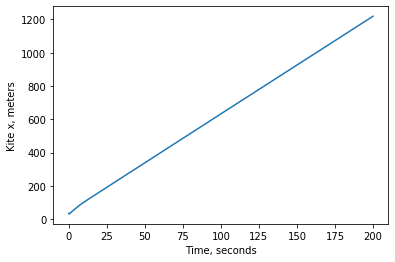

In [52]:
plt.xlabel('Time, seconds')
plt.ylabel('Kite x, meters')
plt.plot(xs, st_traj[:,0])
#plt.savefig(plot_dir + system_name + '/' + run_name + "/kite_x_traj2.png", dpi=200)

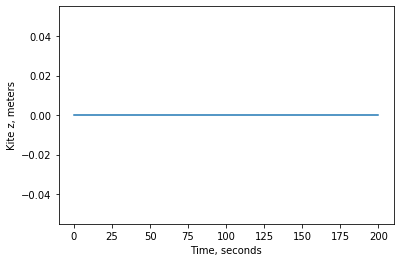

In [53]:
plt.xlabel('Time, seconds')
plt.ylabel('Kite z, meters')
plt.plot(xs, st_traj[:,1])
#plt.savefig(plot_dir + system_name + '/' + run_name + "/kite_y_traj2.png", dpi=200)

In [54]:
len(st_traj)

1000